<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*このノートブックには、Jake VanderPlas による [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) からの抜粋が含まれています。コンテンツは利用可能です [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do).*

※テキストは[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode)で、コードは[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode)で公開しています。このコンテンツが役立つと思われる場合は、[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode) による作業のサポートを検討してください!*

<!--ナビゲーション-->
< [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) >

<a href="https://colab.research.google.com/github/vitroid/PythonDataScienceHandbook/blob/ja/notebooks/02.07-Fancy-Indexing.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab で開く" title="Google Colaboratory で開いて実行する"></a>


# ファンシーインデックス

前のセクションでは、単純なインデックス (たとえば arr[0]``)、スライス (たとえば arr[0]``) など)、およびブール マスク (たとえば arr[0]``).
このセクションでは、*fancy indexing* として知られる別のスタイルの配列インデックスを見ていきます。
ファンシー インデックスは、既に見た単純なインデックスに似ていますが、単一のスカラーの代わりにインデックスの配列を渡します。
これにより、配列の値の複雑なサブセットに非常に迅速にアクセスして変更することができます。

## Fancy Indexing の探索

ファンシー インデックスは、概念的には単純です。インデックスの配列を渡して、複数の配列要素に一度にアクセスすることを意味します。
たとえば、次の配列を考えてみます。

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


3 つの異なる要素にアクセスしたいとします。次のようにできます。

In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

または、単一のリストまたはインデックスの配列を渡して、同じ結果を得ることができます。

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

ファンシー インデックスを使用する場合、結果の形状は、*インデックス付けされる配列*の形状ではなく、*インデックス配列*の形状を反映します。

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

ファンシー インデックスは、多次元でも機能します。次の配列を検討してください。

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

標準のインデックス作成と同様に、最初のインデックスは行を参照し、2 番目のインデックスは列を参照します。

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

結果の最初の値は ``X[0, 2]``、2 番目の値は ``X[1, 1]``、3 番目の値は ``X[2, 3]`` であることに注意してください。
ファンシー インデックス作成でのインデックスのペアリングは、[Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) で説明されているすべてのブロードキャスト ルールに従います。
したがって、たとえば、インデックス内で列ベクトルと行ベクトルを組み合わせると、2 次元の結果が得られます。

In [7]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

ここでは、算術演算のブロードキャストで見たのとまったく同じように、各行の値が各列ベクトルと一致します。
例えば：

In [8]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

ファンシーなインデックス付けでは、戻り値がインデックス付けされる配列の形状ではなく、*ブロードキャストされたインデックスの形状*を反映することを覚えておくことが常に重要です。

## 複合索引付け

さらに強力な操作を行うために、派手なインデックス作成を、これまでに見た他のインデックス作成スキームと組み合わせることができます。

In [9]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


ファンシーなインデックスとシンプルなインデックスを組み合わせることができます。

In [10]:
X[2, [2, 0, 1]]

array([10,  8,  9])

ファンシーインデックスとスライスを組み合わせることもできます。

In [11]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

ファンシー インデックスとマスキングを組み合わせることができます。

In [12]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

これらのインデックス作成オプションをすべて組み合わせると、配列値にアクセスして変更するための非常に柔軟な一連の操作が可能になります。

## 例: ランダム ポイントの選択

ファンシー インデックスの一般的な用途の 1 つは、行列から行のサブセットを選択することです。
たとえば、$D$ 次元の $N$ ポイントを表す $N$ x $D$ 行列がある場合があります。たとえば、2 次元正規分布から引き出された次のポイントなどです。

In [13]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

[Introduction to Matplotlib](04.00-Introduction-To-Matplotlib.ipynb) で説明するプロット ツールを使用して、これらの点を散布図として視覚化できます。

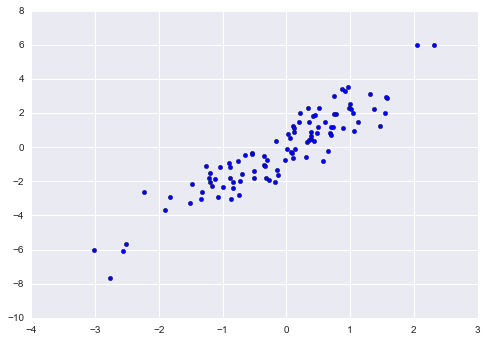

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

ファンシー インデックスを使用して、ランダムに 20 点を選択してみましょう。これを行うには、最初に繰り返しのない 20 個のランダムなインデックスを選択し、これらのインデックスを使用して元の配列の一部を選択します。

In [15]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([93, 45, 73, 81, 50, 10, 98, 94,  4, 64, 65, 89, 47, 84, 82, 80, 25,
       90, 63, 20])

In [16]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

どのポイントが選択されたかを確認するために、選択したポイントの位置に大きな円を重ねてプロットしてみましょう。

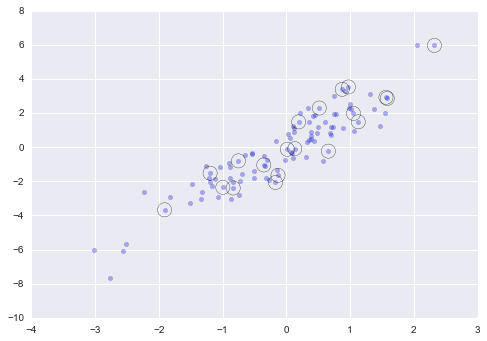

In [17]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

この種の戦略は、統計モデルの検証のためのトレーニング/テスト分割 ([Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) を参照) や、統計上の質問に答えるためのサンプリング アプローチでよく必要とされるように、データセットをすばやく分割するためによく使用されます。

## Fancy Indexing による値の変更

ファンシー インデックスを使用して配列の一部にアクセスできるように、配列の一部を変更することもできます。
たとえば、インデックスの配列があり、配列内の対応する項目に値を設定したいとします。

In [18]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


これには、任意の代入型演算子を使用できます。例えば：

In [19]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


ただし、これらの操作でインデックスを繰り返すと、予期しない結果が生じる可能性があることに注意してください。次の点を考慮してください。

In [20]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


4人はどこへ行った？この操作の結果、最初に ``x[0] = 4`` が割り当てられ、続いて ``x[0] = 6`` が割り当てられます。
もちろん、その結果、 ``x[0]`` には値 6 が含まれます。

十分ですが、次の操作を検討してください。

In [21]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

x[3] には値 2 が含まれ、 x[4] には値 3 が含まれると予想されるかもしれません。これは、各インデックスが繰り返される回数です。そうでないのはなぜですか？
概念的には、これは ``x[i] += 1`` が ``x[i] = x[i] + 1`` の短縮形として意図されているためです。 ``x[i] + 1`` が評価され、その結果が x のインデックスに割り当てられます。
これを念頭に置いて、複数回発生するのは拡張ではなく、かなり非直感的な結果につながる代入です。

では、操作が繰り返される別の動作が必要な場合はどうでしょうか?これには、ufuncs の ``at()`` メソッド (NumPy 1.8 以降で使用可能) を使用して、次のことを行うことができます。

In [22]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


``at()`` メソッドは、指定されたインデックス (ここでは ``i``) で、指定された値 (ここでは 1) で指定された演算子のインプレース適用を行います。
精神的に似ている別のメソッドは、ufuncs の ``reduceat()`` メソッドです。これについては、NumPy のドキュメントで読むことができます。

## 例: データのビニング

これらのアイデアを使用して、データを効率的にビン化し、手動でヒストグラムを作成できます。
たとえば、1,000 個の値があり、それらがビンの配列内のどこにあるかをすばやく見つけたいとします。
次のように ufunc.at を使用して計算できます。

In [23]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

カウントは、各ビン内のポイントの数、つまりヒストグラムを反映するようになりました。

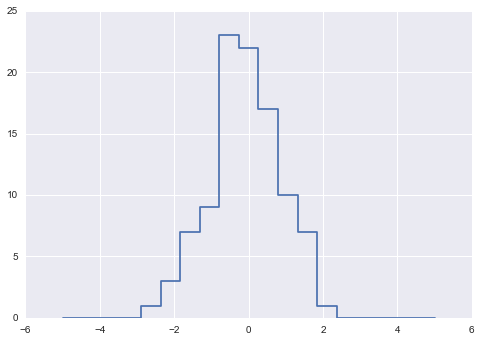

In [24]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

もちろん、ヒストグラムをプロットするたびにこれを行わなければならないのはばかげています。
これが、Matplotlib が ``plt.hist()`` ルーチンを提供する理由です。これは、1 行で同じことを行います。

```python
plt.hist(x, bins, histtype='step');
```

この関数は、ここで見られるものとほぼ同じプロットを作成します。
ビニングを計算するために、「matplotlib」は「np.histogram」関数を使用します。この関数は、以前に行った計算と非常によく似た計算を行います。ここで 2 つを比較してみましょう。

In [25]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
10000 loops, best of 3: 97.6 µs per loop
Custom routine:
10000 loops, best of 3: 19.5 µs per loop


私たち独自の 1 行アルゴリズムは、NumPy で最適化されたアルゴリズムよりも数倍高速です!どうすればいいの？
``np.histogram`` ソースコードを掘り下げると (これは IPython で ``np.histogram??`` と入力して実行できます)、単純な検索よりもかなり複雑であることがわかります。そして、私たちが行ったことを数えます。これは、NumPy のアルゴリズムがより柔軟であり、特にデータ ポイントの数が多くなったときにパフォーマンスが向上するように設計されているためです。

In [26]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
10 loops, best of 3: 68.7 ms per loop
Custom routine:
10 loops, best of 3: 135 ms per loop


この比較が示しているのは、アルゴリズムの効率が単純な問題になることはほとんどないということです。大きなデータセットに対して効率的なアルゴリズムが、小さなデータセットに対して常に最適な選択であるとは限りません。また、その逆も同様です ([Big-O Notation](02.08-Sorting.ipynb#Aside:-Big-O-Notation) を参照)。
しかし、このアルゴリズムを自分でコーディングする利点は、これらの基本的な方法を理解していれば、これらのビルディング ブロックを使用してこれを拡張し、非常に興味深いカスタム動作を実行できることです。
データ集約型アプリケーションで Python を効率的に使用するための鍵は、np.histogram のような一般的な便利なルーチンと、それらが適切な場合について知ることですが、より明確な動作が必要な場合に低レベルの機能を利用する方法を知ることでもあります.

<!--ナビゲーション-->
< [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) >

<a href="https://colab.research.google.com/github/vitroid/PythonDataScienceHandbook/blob/ja/notebooks/02.07-Fancy-Indexing.ipynb"><img align="left" src="https: //colab.research.google.com/assets/colab-badge.svg" alt="Colab で開く" title="Google Colaboratory で開いて実行する"></a>
